![Alt text: Slogan da Meteora.](https://i.imgur.com/VDYh2G1.png)

# 1. Estruturando a tabela

**Meteora** é uma loja que vende roupas e acessórios de diversas marcas por todos os estados do Brasil, para entender suas bases de dados e exibir informações relevantes com o objetivo de auxiliar suas tomadas de decisão.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sqlalchemy import create_engine, inspect,text

**Sobre as tabelas**

* itens_pedidos: tabela que informa sobre o que foi vendido, vai ter informação o preço, quantidade, para onde vai ser enviado e o frete do pedido
* pedidos: vai falar sobre a venda feita, tendo informação sobre os vendedores, preço do pedido e a data da venda
* produtos: informa características dos produtos que são comercializados na loja
* vendedores: informa o nome dos vendedores.

In [6]:
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produtos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'

In [7]:
itens_pedidos = pd.read_csv(url_itens_pedidos)
pedidos = pd.read_csv(url_pedidos)
produtos = pd.read_csv(url_produto)
vendedores = pd.read_csv(url_vendedores)

In [4]:
engine = create_engine('sqlite:///:memory:')

In [8]:
produtos.to_sql('produtos', engine, index = False)

205

In [9]:
itens_pedidos.to_sql('itens_pedidos', engine, index = False)
pedidos.to_sql('pedidos', engine, index = False)
vendedores.to_sql('vendedores', engine, index = False)

5

In [10]:
inspector = inspect(engine)
print(inspector.get_table_names())

['itens_pedidos', 'pedidos', 'produtos', 'vendedores']


# 2. Primeiras consultas

Vamos entender a característica do produto que é comercializadora na Meteora, analisando a **condição** dos produtos vendidos.

In [12]:
query = 'SELECT CONDICAO FROM PRODUTOS'

In [14]:
with engine.connect() as conexao:
    consulta = conexao.execute(text(query))
    dados = consulta.fetchall()
pd.DataFrame(dados, columns = consulta.keys())
    

,Condicao
0,Usado
1,Usado
2,Usado
3,Usado
4,Usado
...,...
200,Usado
201,Usado
202,Usado
203,Usado


In [19]:
def sql_df(query):
    with engine.connect() as conexao:
        consulta = conexao.execute(text(query))
        dados = consulta.fetchall()
    return pd.DataFrame(dados, columns = consulta.keys())

In [22]:
query = '''SELECT CONDICAO, COUNT(*) AS 'Quantidade'
FROM PRODUTOS GROUP BY CONDICAO;'''

df_produtos = sql_df(query)
df_produtos

,Condicao,Quantidade
0,Novo com etiqueta,22
1,Novo sem etiqueta,7
2,Usado,176


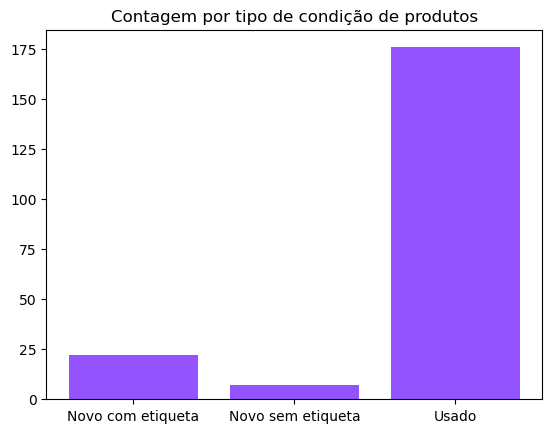

In [24]:
plt.bar(df_produtos['Condicao'], df_produtos['Quantidade'], color = '#9353FF')
plt.title('Contagem por tipo de condição de produtos')
plt.show()

Agora precisamos ranquear os produtos que mais foram pedidos por **quantidade** para entender a necessidade de um estoque de produtos na loja.

In [25]:
sql_df('SELECT * FROM PRODUTOS').head(3)

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado


In [26]:
sql_df('SELECT * FROM ITENS_PEDIDOS').head(3)

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0


In [29]:
query = '''SELECT PRODUTOS.PRODUTO, SUM(ITENS_PEDIDOS.QUANTIDADE) AS Quantidade
FROM ITENS_PEDIDOS, PRODUTOS
WHERE ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
GROUP BY PRODUTO
ORDER BY QUANTIDADE ASC
'''

df_prod_quant = sql_df(query)
df_prod_quant

,produto,Quantidade
0,Vestido Malha Estampa,318
1,Blusa Listrada Malha,322
2,Blusa Malha Azul,325
3,Blusa Babados Off-white,337
4,Blusa Cinza,341
...,...,...
196,Saia Midi Cinto,549
197,Calca Alfaiataria Preta,750
198,Saia Pregas Preta,751
199,Calca Jeans Costuras,755


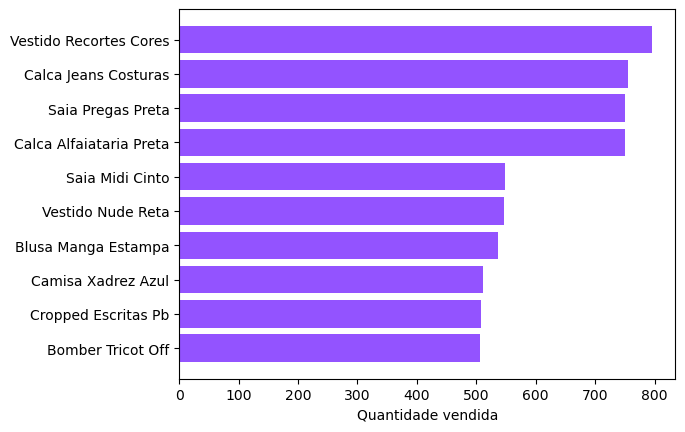

In [32]:
plt.barh(df_prod_quant['produto'][-10:], df_prod_quant['Quantidade'][-10:], color = '#9353FF')
plt.xlabel('Quantidade vendida')
plt.show()

### DESAFIO I:

Esse primeiro desafio vai ser constituído de duas análises, a primeira tem por objetivo calcular a receita total obtida com a venda de itens. Na tabela itens_pedidos, o valor total dos itens representa o cálculo da quantidade pelo valor unitário e pode ser considerado como a receita da venda.

In [34]:
query = '''SELECT SUM(VALOR_TOTAL) AS RECEITA FROM ITENS_PEDIDOS'''
receita = sql_df(query)
receita

,RECEITA
0,45803930


### DESAFIO II

Já a segunda análise visa identificar quais as 15 marcas que foram as mais pedidas por quantidades de venda. Busque mostrar essa lista em uma visualização, além de expor o nome das marcas.

In [45]:
query = '''SELECT PRODUTOS.MARCA, SUM(ITENS_PEDIDOS.QUANTIDADE) AS Quantidade
        FROM PRODUTOS, ITENS_PEDIDOS
        WHERE PRODUTOS.PRODUTO_ID = ITENS_PEDIDOS.PRODUTO_ID
        GROUP BY PRODUTOS.MARCA
        ORDER BY Quantidade ASC'''

df_quant = sql_df(query)
df_quant

,marca,Quantidade
0,Track & Field,322
1,Talie Nk,325
2,Bcbgmaxzria,333
3,Express,342
4,All Saints Spitalfields,349
...,...,...
112,Banana Republic,2045
113,Le Lis Blanc,2479
114,Animale,4013
115,Mixed,5748


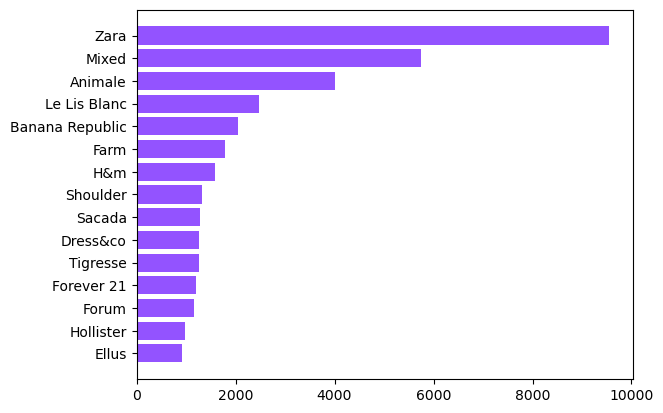

In [46]:
plt.barh(df_quant['marca'][-15:], df_quant['Quantidade'][-15:], color = '#9353FF')
plt.show()

# 3. Lidando com filtro

Vamos iniciar uma análise de desempenho do **time de vendedores** da Meteora. A intenção aqui é entender como se deram as vendas dos vendedores no **ano anterior** para que possam ser aplicadas promoções e bônus salarial para a equipe no ano atual da tabela que é 2021

In [76]:
sql_df('SELECT * FROM PEDIDOS').head(3)

,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600


In [49]:
sql_df('SELECT * FROM PEDIDOS').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pedido_id    24527 non-null  int64 
 1   produto_id   24527 non-null  int64 
 2   vendedor_id  24527 non-null  int64 
 3   data_compra  24527 non-null  object
 4   total        24527 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 958.2+ KB


Para entender o desempenho de vendas dos vendedores no ano de 2020, é preciso trabalhar com os dados que estão presentes apenas no ano de 2020.

In [62]:
query = '''SELECT VENDEDORES.NOME_VENDEDOR, AVG(PEDIDOS.TOTAL) AS 'Média das vendas'
        FROM PEDIDOS, VENDEDORES
        WHERE strftime('%Y', data_compra) = '2020' and VENDEDORES.VENDEDOR_ID = PEDIDOS.VENDEDOR_ID
        GROUP BY VENDEDORES.NOME_VENDEDOR
        ORDER BY AVG(PEDIDOS.TOTAL) DESC'''

sql_df(query)

,nome_vendedor,Média das vendas
0,Daniel Siqueira,1972.338526
1,Millena Pereira,1894.614343
2,Ana Duarte,1843.452582
3,Nadia Oliveira,1818.342200
4,Paulo Calanca,1813.469855


### DESAFIO III

Vamos aos desafios dessa aula, o primeiro é exibir os 10 produtos mais vendidos durante o ano de 2019, que podem ser representados em uma tabela.

In [63]:
sql_df('SELECT * FROM PRODUTOS').head(3)

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado


In [68]:
query = '''SELECT PRODUTOS.PRODUTO, COUNT(PRODUTOS.PRODUTO_ID) AS 'Quantidade Vendida'
        FROM PEDIDOS, PRODUTOS
        WHERE strftime('%Y', PEDIDOS.DATA_COMPRA) = '2019' AND PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
        GROUP BY PRODUTOS.PRODUTO
        ORDER BY COUNT(PRODUTOS.PRODUTO_ID) DESC
        LIMIT 10
        '''

sql_df(query)

,produto,Quantidade Vendida
0,Vestido Recortes Cores,85
1,Calca Jeans Costuras,81
2,Saia Pregas Preta,73
3,Calca Alfaiataria Preta,66
4,Camisa Xadrez Azul,60
5,Bomber Tricot Off,56
6,Shorts Bordado Branco,55
7,Blusa Manga Estampa,54
8,Saia Midi Cinto,53
9,Saia Evase Cinza,53


### DESAFIO IV

Já o segundo será publicar a distribuição através dos meses da receita obtida em vendas no ano de 2021. Busque mostrar essa distribuição colocando o mês e sua receita correspondente na visualização.

In [74]:
query = '''SELECT strftime('%m', data_compra) AS Mês, SUM(Total) AS Receita
        FROM PEDIDOS
        WHERE strftime('%Y', data_compra) = '2021'
        GROUP BY Mês'''

sql_df(query)



,Mês,Receita
0,01,2097109
1,02,1140729
2,03,51525


# 4. Avançando nas relações

A Meteora agora deseja incrementar as suas vendas no **estado de São Paulo (SP)**, por acreditar ser uma região mais propícia às vendas já que tem uma boa concentração de pessoas e mercado também.

Mas será que São Paulo já não rende muitas vendas em relação a outros estados?

In [79]:
sql_df('SELECT * FROM ITENS_PEDIDOS').head(3)

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0


In [82]:
query = '''SELECT ESTADO, COUNT(*) AS Pedidos
        FROM ITENS_PEDIDOS
        GROUP BY ESTADO
        ORDER BY Pedidos DESC'''

sql_df(query)

,Estado,Pedidos
0,BR-MA,974
1,BR-DF,953
2,BR-MT,937
3,BR-GO,933
4,BR-PA,932
5,BR-AL,928
6,BR-PE,927
7,BR-RR,925
8,BR-RO,925
9,BR-RN,921


In [83]:
df_agrupados = itens_pedidos.groupby('Estado').size().reset_index(name='Pedidos')
df_estados = df_agrupados.sort_values('Pedidos', ascending=False).reset_index(drop=True)
df_estados

,Estado,Pedidos
0,BR-MA,974
1,BR-DF,953
2,BR-MT,937
3,BR-GO,933
4,BR-PA,932
5,BR-AL,928
6,BR-PE,927
7,BR-RO,925
8,BR-RR,925
9,BR-RN,921


Uma das ações que a Meteora pretende seguir para as vendas em SP é escolher dois de seus vendedores para que eles **foquem suas vendas** lá. Para essa escolha é interessante ter os profissionais que **mais tenham vendido** para as pessoas da região.

In [88]:
query = '''SELECT VENDEDORES.NOME_VENDEDOR, COUNT(*) as quantidade_vendas
        FROM PEDIDOS
        JOIN VENDEDORES ON VENDEDORES.VENDEDOR_ID = PEDIDOS.VENDEDOR_ID
        JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PEDIDO_ID = PEDIDOS.PEDIDO_ID
        WHERE ITENS_PEDIDOS.ESTADO = 'BR-SP'
        GROUP BY VENDEDORES.NOME_VENDEDOR
        ORDER BY quantidade_vendas DESC
        '''

sql_df(query)

,nome_vendedor,quantidade_vendas
0,Daniel Siqueira,190
1,Paulo Calanca,182
2,Nadia Oliveira,181
3,Ana Duarte,180
4,Millena Pereira,157


In [89]:
df_unido = pedidos.merge(vendedores, on='vendedor_id').merge(itens_pedidos, on='pedido_id')
df_filtrado = df_unido.query("Estado == 'BR-SP'")
df_vendedores_sp = df_filtrado.groupby('nome_vendedor').size().reset_index(name='quantidade_vendas')
df_vendedores_sp = df_vendedores_sp.sort_values('quantidade_vendas', ascending=False)
df_vendedores_sp


,nome_vendedor,quantidade_vendas
1,Daniel Siqueira,190
4,Paulo Calanca,182
3,Nadia Oliveira,181
0,Ana Duarte,180
2,Millena Pereira,157


### DESAFIO V

A primeira informação é listar as marcas vendidas em São Paulo por quantidade de pedidos, que podem ser representadas em uma tabela.

In [96]:
query = '''SELECT PRODUTOS.MARCA, COUNT(*) AS 'Quantidade'
        FROM PRODUTOS
        JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID 
        WHERE ITENS_PEDIDOS.ESTADO = 'BR-SP'
        GROUP BY PRODUTOS.MARCA
        ORDER BY Quantidade DESC
        '''

sql_df(query)

,marca,Quantidade
0,Zara,100
1,Mixed,58
2,Animale,44
3,Le Lis Blanc,26
4,Banana Republic,18
...,...,...
111,Topshop,1
112,Morena Rosa,1
113,Erre Erre,1
114,Bobô,1


### DESAFIO VI

Já a segunda informação é publicar os produtos que são mais vendidos na época de Natal no Brasil todo. Essa última informação é aplicada a todos os estados porque somente o estado de São Paulo pode não trazer uma quantidade relevante de informações.

In [105]:
query = '''SELECT PRODUTOS.PRODUTO, COUNT(*) AS Quantidade
        FROM PRODUTOS
        JOIN PEDIDOS ON PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
        WHERE strftime('%m', PEDIDOS.DATA_COMPRA) = '12'
        GROUP BY PRODUTOS.PRODUTO
        ORDER BY Quantidade DESC
        '''

sql_df(query)

,produto,Quantidade
0,Vestido Recortes Cores,30
1,Vestido Preto Franzido,26
2,Calca Jeans Costuras,26
3,Calca Alfaiataria Preta,26
4,Camisa Xadrez Azul,25
...,...,...
196,Sneaker Monograma Bege,6
197,Casaqueto Estampa Geometrica,6
198,Regata Renda Branca,5
199,Body Estampa Coracoes,5
